<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cryptocurrency-Analysis-with-Python:-Introduction-to-Tail-Risk-Metrics" data-toc-modified-id="Cryptocurrency-Analysis-with-Python:-Introduction-to-Tail-Risk-Metrics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cryptocurrency Analysis with Python: Introduction to Tail Risk Metrics</a></span></li><li><span><a href="#Maximum-DrawDown-(MDD)" data-toc-modified-id="Maximum-DrawDown-(MDD)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maximum DrawDown (MDD)</a></span></li><li><span><a href="#Maximum-DrawDown-(MDD)-duration" data-toc-modified-id="Maximum-DrawDown-(MDD)-duration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Maximum DrawDown (MDD) duration</a></span></li><li><span><a href="#Calmar-Ratio" data-toc-modified-id="Calmar-Ratio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calmar Ratio</a></span><ul class="toc-item"><li><span><a href="#Compound-Annual-Growth-Rate-(CAGR)" data-toc-modified-id="Compound-Annual-Growth-Rate-(CAGR)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Compound Annual Growth Rate (CAGR)</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

## Cryptocurrency Analysis with Python: Introduction to Tail Risk Metrics
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/me/stories/public)

Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In our previous tutorials, we explored how to use powerful Python libraries such as Matplotlib, mplfinance, and yfinance to load and visualize cryptocurrency data from popular sources like Yahoo Finance. We've also introduced two of the most impactful risk-adjusted performance metrics: the Sharpe Ratio and the Sortino Ratio. We successfully implemented the Simple Moving Average (SMA) Crossover Strategy, calculated associated trading costs encompassing commissions, spreads, and slippage, and further optimized the strategy by exploring diverse parameter combinations to identify optimal settings.

In this tutorial, we're taking things a step further by introducing tail risk metrics, and specifically, we'll be focusing on the informative Calmar Ratio and diving deep into the pivotal aspects of drawdown duration and maximum drawdown.These metrics hold the key to understanding the worst-case scenarios, the tails of the distribution, and the resilience of our cryptocurrency investment strategy during challenging periods.

I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my GitHub.

Disclaimer: This blog post is not financial advice. This is purely introductory knowledge. Past results are not always predictive of future results. All investment-related queries should be directed to your financial advisor.

## Maximum DrawDown (MDD)
Tail risk metrics are used to measure the risk of extreme events that can cause significant losses in financial markets. a very useful metric for measuring extremely negative outcomes is the maximum drawdown (MDD). MDD is a crucial principle in finance, representing the most substantial decline (loss) in the value of an investment or portfolio from its highest peak to the lowest trough (lowest point) over a specified period. It offers valuable information about the most significant loss an investor may have encountered during that particular timeframe (the higher the maximum drawdown higher the risk for an investment) [1].


The code below downloads historical price data for a specific cryptocurrency (in this case, Bitcoin, with the symbol "BTC-USD") using the Yahoo Finance API. It then processes this data to calculate various financial metrics related to investment performance, particularly focusing on the concept of maximum drawdown. More precisely:

 - `Log_Returns= np.log(df.div(df.shift()))`: Calculates Log Returns (for more information about Log Returns please see here).  
 

 - `Log_Returns["Cumulative Returns"]= Log_Returns["Close"].cumsum().apply(np.exp)`: Calculates Cumulative Returns with a base of 1 (accumulate the daily Log Returns over the entire investment period).When we talk about Cumulative Returns with a base of 1, we are referring to the practice of measuring the growth or decline of an investment as if it started with an initial value of 1. In other words, it's a relative measure that tracks how an investment would have changed if its initial value was set to 1 at the beginning of the investment period (making it easier to compare the performance of different cryptocurrencies, especially when they have different starting values). A positive cumulative return indicates that the investment has grown over the period, while a negative cumulative return indicates a decline.  

 -`Log_Returns['Cumulative Max'] = Log_Returns['Cumulative Returns'].cummax()`: Calculates and stores the "Cumulative Max" values in a new column. "Cumulative Max" column tracks the highest value encountered in the "Cumulative Returns" column up to that specific date. **The Cumulative Max value remains the same or increases over time because it represents the highest cumulative value achieved up to that point.**  
 

![CumulativeMAX](Cumulative2.jpg)  


- `Log_Returns['drawdown'] = -(Log_Returns['Cumulative Returns']-Log_Returns['Cumulative Max'])/Log_Returns['Cumulative Max']`: Calculates the drawdown for each data point in the DataFrame. Drawdown is a measure of the decline from a historical peak in a time series, expressed as a percentage. The drawdown is calculated by taking the negative value (we use negative sign in order to rappresent drawdown as postive number for easier interpretation) of the difference between the 'Cumulative Returns' column and the 'Cumulative Max' column, divided by the 'Cumulative Max' column.  


- `max_drawdown_value = Log_Returns['drawdown'].max()`: Calculates the maximum drawdown value from the 'drawdown' column.  


- `max_drawdown_index = Log_Returns['drawdown'].idxmax()`: Finds the index (time stamp) where the maximum drawdown value occurs in the 'drawdown' column.  



In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the cryptocurrency symbols and the date range
ticker=["BTC-USD"]
start_date = '2013-07-01'
end_date = '2023-08-08'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(ticker, start=start_date, end=end_date)
# Extract the closing prices of the cryptocurrencies
df =data[["Close"]]

# Handling zero or negative values
df = df.replace(0, np.nan)  # Replace zeros with NaN

Log_Returns= np.log(df.div(df.shift()))# Calculate Log-Returns
Log_Returns.dropna(inplace=True)
Log_Returns.rename(columns={"Close":"Log Returns"}, inplace=True)

# We can see how the investment grows over time by creating a new column of cumulative returns based on the Log-Returns 
Log_Returns["Cumulative Returns"]= Log_Returns["Log Returns"].cumsum().apply(np.exp)

# Calculate the cumulative maximum with the method cummax
Log_Returns['Cumulative Max'] = Log_Returns['Cumulative Returns'].cummax()

# Calculates the drawdown
Log_Returns['drawdown'] = -(Log_Returns['Cumulative Returns']-Log_Returns['Cumulative Max'])/Log_Returns['Cumulative Max']

# Find the maximum drawdown value and its index
max_drawdown_value = Log_Returns['drawdown'].max()
max_drawdown_index = Log_Returns['drawdown'].idxmax()

print("Maximum Drawdown Value:", max_drawdown_value)
print("Index of Maximum Drawdown:", max_drawdown_index)

[*********************100%***********************]  1 of 1 completed
Maximum Drawdown Value: 0.8339900882218971
Index of Maximum Drawdown: 2018-12-15 00:00:00


**In summary, the output tells us that the Bitcoin investment experienced its largest drawdown around December 15, 2018. At that point, the investment's value had declined by approximately 83.40% from its previous peak.**





The code below generates a plot to visualize the maximum drawdown (MDD) for Bitcoin based on the Log_Returns DataFrame, and it highlights (red dashed line) the date when the maximum drawdown occurred.

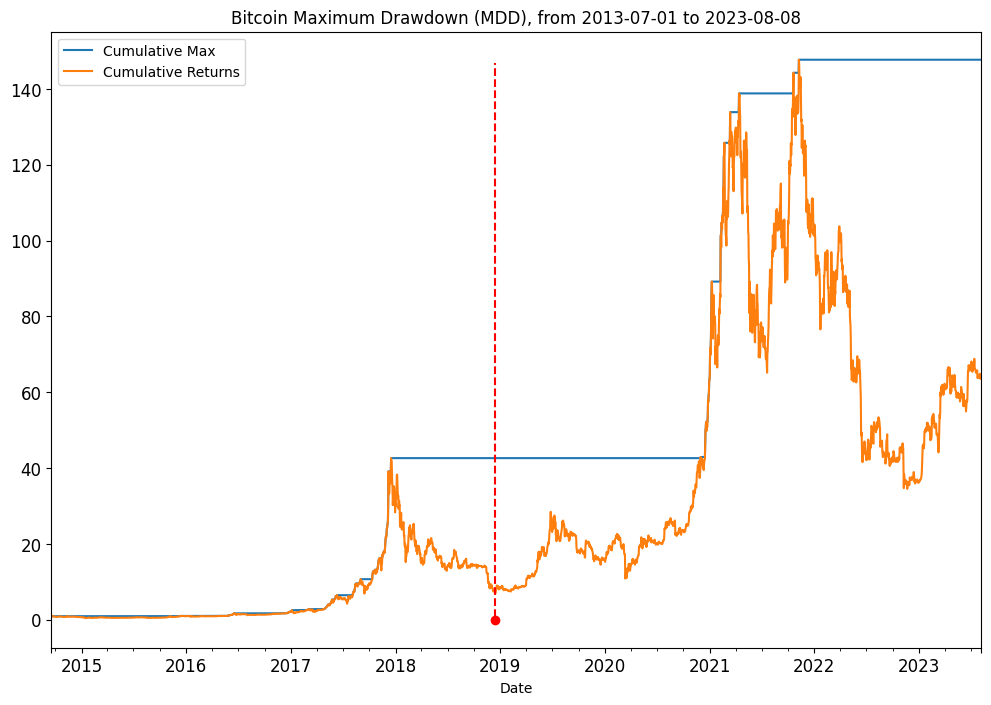

In [2]:
ax = Log_Returns[['Cumulative Max', 'Cumulative Returns']].plot(title=f"Bitcoin Maximum Drawdown (MDD), from {start_date} to {end_date}", figsize=(12, 8), fontsize=12)
ax.scatter(max_drawdown_index,(-((Log_Returns['Cumulative Returns']-Log_Returns['Cumulative Max'])/Log_Returns['Cumulative Max']).max()), color='red', label=f'Max Drawdown: {max_drawdown_value:.2%}')

# ax.scatter(max_drawdown_index,max_drawdown_value, color='red', label=f'Max Drawdown: {max_drawdown_value:.2%}')
ax.axvline(max_drawdown_index, ymin=0.05, ymax=0.95, color='red', linestyle='--')

##  Maximum DrawDown (MDD) duration


A relevant metric closely related to the maximum drawdown is the maximum drawdown duration. While it differs in interpretation from the maximum drawdown, it is an extremely intuitive metric. In practice, it helps us understand how long it took to recover from the max drawdown. To understand better the drawdown periods coinsider the following example: Imagine we have been tracking the performance of a cryptoccurency over a period of time. We have the following data, representing the Cumulative returns of the investment:

- Day 1: Cumulative Return = 1.0 (Initial investment)
- Day 2: Cumulative Return = 1.02 (A gain of 2%)
- Day 3: Cumulative Return = 0.99 (A loss of 1% from the previous day)
- Day 4: Cumulative Return = 0.97 (Another loss of 2% from the previous day)
- Day 5: Cumulative Return = 1.03 (A gain of 6% from the previous day)  

The first drawdown period (which represent periods when the investment experiences a decline from a previous peak) starts when: 

**Drawdown 1 (Day 3 to Day 4):**

*Start: Day 3*
*End: Day 4*

![drawdown_period](drawdown_preiod.jpg)


In the code below a drawdown begins when the  Cumulative Returns (representing the total return of the investment up to that point) start declining after reaching a peak. In the provided code, the initiation of a drawdown is identified when the value in the "drawdown" column becomes zero (`Log_Returns["drawdown"] == 0`). This signals the conclusion of a preceding drawdown, signifying a recovery point and potentially marking the inception of a new drawdown phase.Practically, the onset of a drawdown is characterized by the "drawdown" column transitioning to zero, and it concludes when the "drawdown" column reverts to zero once more, indicating that the investment has successfully recuperated [2].



In [3]:
# Identify the indices where drawdowns start 
begin = Log_Returns[Log_Returns["drawdown"] == 0].index
begin

# Shift the indices to find the ending points of drawdowns
end = begin[1:]

# Add the last index of the drawdown column as a potential ending point
end = end.append(pd.DatetimeIndex([Log_Returns["drawdown"].index[-1]]))

# Calculate the duration of each drawdown period in terms of index positions
periods = end - begin
periods

# Find the maximum drawdown duration among all the drawdown periods
maxdd = periods.max()

# Print the maximum drawdown duration
print(maxdd)

# Print the maximum drawdown duration in terms of days
print(maxdd.days)


1080 days 00:00:00
1080


To interpret the results/output we understand that the cryptocurrency (Bitcoin) experienced a decline in value that lasted for 1080 days (Maximum DrawDown (MDD) duration) before recovering to a new peak. This duration gives us insights into how long the cryptocurrency took to recover from its longest temporary decline during the analyzed period.

## Calmar Ratio

The Calmar Ratio, a risk-adjusted performance measure pioneered by Terry A. Young, a fund manager based in California, offers a distinct perspective on investment evaluation. This ratio stands out by placing significant emphasis on the concept of maximum drawdown (shown above). While the Calmar Ratio proves valuable, particularly during periods of rapid performance fluctuations, it's essential to recognize that various variants of this metric exist [3]. The Calmar ratio is calculated by dividing the compound annual growth rate (CAGR) by the maximum drawdown of a particular period.

###  Compound Annual Growth Rate (CAGR)

The Compound Annual Growth Rate (CAGR), alternatively referred to as GAGR, stands as a popular metric within the world of finance and business. CAGR quantifies the average growth rate of monetary values or quantities over a span of years. In finance, it finds extensive application in computing investment returns over an extended time horizon, typically exceeding a year. Although the concept predominantly finds its utility in financial and investment contexts, CAGR's versatility extends to evaluating growth in aspects like sales volumes and website user engagement. Ultimately, CAGR proves to be a valuable computation for comprehending the sustained growth rates of various entities over an extended temporal trajectory. CAGR can be calculated using Simple Returns and Log Returns, although, the Log Returns method is preferred when dealing with investment data because it handles the compounding effect more accurately, especially for smaller periodic returns. Consider the following example:


![CAGR](cagr1.jpg)



The code below calculates the Compound Annual Growth Rate (CAGR) using the mean of Log Returns for Bitcoin and expresses it as a percentage growth rate. This value can be interpreted as the estimated annual growth rate for the Bitcoin.

In [25]:
# Calculate the annualized growth factor using the mean log return
cagr = np.exp(Log_Returns["Log Returns"].mean()*365.25)  -1

# Print the calculated CAGR
print("CAGR using Log Returns:", cagr)

CAGR using Log Returns: 0.5962043705086724


The calculated CAGR (Compound Annual Growth Rate) using the Log Returns method for Bitcoin is approximately 0.5962, or about 59.62%, suggesting that, on average, the investment has been growing at a rate of around 59.62% per year based on the log returns (helping us to evaluate its historical performance in a standardized manner).

The Calmar Ratio as described above is typically calculated using the CAGR (Compound Annual Growth Rate) and the Maximum Drawdown. The formula for Calmar Ratio is:

![calmar](calmar.jpg)

**"We have previously calculated CAGR and Maximum Drawdow**

In [26]:

# Calculate Calmar Ratio
calmar_ratio = cagr / max_drawdown_value

# Print the calculated Calmar Ratio
print("Calmar Ratio:", calmar_ratio)


Calmar Ratio: 0.7148818420370029



The calculated Calmar Ratio of approximately 0.7149 indicating that the risk-adjusted performance of our investment to Bitcoin. This ratio signifies that for each unit of CAGR (Compound Annual Growth Rate) achieved, there is a corresponding value of approximately 0.7149 for the Maximum Drawdown. A higher Calmar Ratio generally suggests better risk-adjusted performance, as it implies that the investment generated higher returns in proportion to the maximum drawdown it experienced.

## Conclusions


Throughout this comprehensive tutorial series on Cryptocurrency Analysis with Python, we have delved into the intricacies of the Calmar Ratio and extensively explored the critical aspects of drawdown duration and maximum drawdown. The Calmar Ratio is particularly responsive to changes, providing an early indicator compared to other ratios. It proves valuable in evaluating the historical performance of our investment. Furthermore, it might offer insights into potential future performance. However, it's important to note that in the realm of cryptocurrencies, the Calmar Ratio and drawdown metrics are just a portion of the puzzle. Making well-informed and prudent decisions within the dynamic and evolving cryptocurrency landscape demands a holistic understanding of various factors beyond these metrics.

    
**Remember that while past performance can offer insights, it does not guarantee future results. Always approach cryptocurrency trading with a well-defined strategy, discipline, and a deep understanding of the risks involved. Happy trading!!**


If you enjoy reading stories of this nature and wish to show your support for my writing, you may contemplate becoming a Medium member. By subscribing for just $5 per month, you’ll gain boundless entry to a vast collection of Python guides and Data science articles. Additionally, if you choose to sign up through my referral link, I’ll receive a modest commission at no extra cost to you.

## References:
[1]	MicroBioscopicData, “Cryptocurrency Analysis with Python: A Beginner’s Guide to the Simple Moving Average (SMA)…,” Medium, Jul. 28, 2023. https://medium.com/coinmonks/cryptocurrency-analysis-with-python-a-beginners-guide-to-the-simple-moving-average-sma-557352a9f59b (accessed Aug. 13, 2023).  

[2]	“Performance Optimization and Risk Management for Trading,” Udemy. https://www.udemy.com/course/performance-optimization-and-risk-management-for-trading/ (accessed Aug. 14, 2023).  

[3]	“Calmar Ratio,” Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/capital-markets/calmar-ratio/ (accessed Aug. 14, 2023).

